<h1 style='background:#2da6c4;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>Scraping Box Office Mojo Data Using Python</center></h1>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from bs4 import BeautifulSoup
import requests
from datetime import date

<div align=center>
    <img src="https://www.parsehub.com/blog/content/images/2021/06/what-is-web-sraping-parsehub.jpeg" width=500/>
</div>

Web scraping is simply crawling the html and javascript of a webpage to extract the details we want to use as data. The most complicated part of this is inspecting the webpage source code to determine what to grab and what to ignore. 

In this demo I'll demonstrate how to create a dataset from the weekend performance page of Box Office Mojo, a great datasource for box office performance data. The associated dataset that is created and updated from this notebook can be found here:

### [U.S. Weekend Box Office Summary](https://www.kaggle.com/datasets/jonbown/weekend-box-office-summaries)


<div style="padding:10px; 
            color:#2da6c4;
            margin:10px;
            font-size:150%;
            display:fill;
            border-radius:1px;
            border-style: solid;
            border-color:#2da6c4;
            background-color:black;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b>Table of Contents</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="#1">1 -  Check if website allows Scraping</a>
        </li>
        <li>
            <a href="#2">2 - Determine the URL</a>
        </li>
        <li>
            <a href="#3">3 - Make Request</a>
        <li>
            <a href="#4">4 - Use Beautiful Soup</a>
        </li> 
        <li>
            <a href="#5">5 - Inspection</a>
        </li>
        <li>
            <a href="#6">6 - Testing</a>
        </li>
        <li>
            <a href="#7">7 - Create Write Function</a>
        </li>
        <li>
            <a href="#8">8 - Finishing Up</a>
        </li>
    </ul>
</div>

<h1 style='background:#2da6c4;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>1. Check if website allows scraping</center></h1>

Take the root of the url, in this case https://www.boxofficemojo.com and add '/robots.txt' to the end. This will come up with a page that shows what type of web scraping is allowed or disallowed. Thankfully Box Office Mojo allows all.

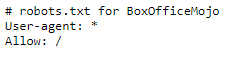

<a id="2"></a>
<h1 style='background:#2da6c4;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>2. Determine the URL</center></h1>

In [2]:
# Request to website and download HTML contents
url='https://www.boxofficemojo.com/weekend/by-year/2021/'
#you may need to play around with the different urls to find the ones that take parameters

<a id="3"></a>
<h1 style='background:#2da6c4;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>3. Make Request</center></h1>

In [3]:
req=requests.get(url)
content=req.text

<a id="4"></a>
<h1 style='background:#2da6c4;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>4. Use Beautiful Soup</center></h1>

In [4]:
soup=BeautifulSoup(content)

<a id="5"></a>
<h1 style='background:#2da6c4;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>5. Inspect page data to determine out to set up the scraping algorithm</center></h1>

> Generally tabular data that is visible on the page will be put into 'tr' tags. With some of the code below I am exploring edge cases in the ouput of the page. When there is a special occasion for the weekend, in this case thanksgiving, there is a different format and structure that is displayed.

In [5]:
rows=soup.findAll('tr')

In [6]:
data = rows[8].findAll('td')

In [7]:
data

[<td class="a-text-left mojo-header-column mojo-truncate mojo-field-type-date_interval mojo-sort-column"><a class="a-link-normal" href="/weekend/2021W48/occasion/us_thanksgiving_5/?ref_=bo_wey_table_8">Nov 24-28</a><div class="a-section a-spacing-none"><span class="a-size-small a-color-secondary">Thanksgiving 5-Day</span></div></td>,
 <td class="a-text-right mojo-field-type-money">$137,256,716</td>,
 <td class="a-text-right mojo-field-type-percent_delta">-</td>,
 <td class="a-text-right mojo-field-type-money mojo-estimatable">$142,082,464</td>,
 <td class="a-text-right mojo-field-type-percent_delta mojo-estimatable">-</td>,
 <td class="a-text-right mojo-field-type-positive_integer">42</td>,
 <td class="a-text-left mojo-field-type-release mojo-cell-wide"><a class="a-link-normal" href="/release/rl1887208961/?ref_=bo_wey_table_8">Encanto</a></td>,
 <td class="a-text-left mojo-field-type-genre hidden">-</td>,
 <td class="a-text-right mojo-field-type-money hidden">-</td>,
 <td class="a-text

In [8]:
#Date when there is a special occasion listed
data[0].findAll('a')[0].text

'Nov 24-28'

In [9]:
#Special occasion that is listed
data[0].findAll('span')[0].text

'Thanksgiving 5-Day'

In [10]:
data[0].findAll('span')

[<span class="a-size-small a-color-secondary">Thanksgiving 5-Day</span>]

<a id="6"></a>
<h1 style='background:#2da6c4;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>6. Test data construction</center></h1>

In [11]:
appended_data = []
for row in rows:
    data_row = {}
    data = row.findAll('td')
    if len(data) == 0:
        continue
    if len(data[0].findAll('span')) > 0:
        #special weekend
        data_row['occasion'] = data[0].findAll('span')[0].text
        data_row['date'] = data[0].findAll('a')[0].text
    else:
        #normal weekend
        data_row['occasion'] = ""
        data_row['date'] = data[0].text
    data_row['top10_gross'] = data[1].text
    data_row['top10_wow_change'] = data[2].text
    data_row['overall_gross'] = data[3].text
    data_row['overall_wow_change'] = data[4].text
    data_row['num_releases'] = data[5].text
    data_row['top_release'] = data[6].text
    data_row['week_no'] = data[10].text
    appended_data.append(data_row)
weekend_data = pd.DataFrame(appended_data, columns = ['date','occasion', 'top10_gross', 'top10_wow_change', 'overall_gross', 'overall_wow_change', 'num_releases', 'top_release', 'week_no']) 

In [12]:
weekend_data.head()

,date,occasion,top10_gross,top10_wow_change,overall_gross,overall_wow_change,num_releases,top_release,week_no
0,"Dec 31-Jan 2, 2022",,"$95,723,075",-31.6%,"$98,910,707",-31.2%,35,Spider-Man: No Way Home,53
1,Dec 24-26,,"$139,868,872",-50.4%,"$143,835,740",-49.2%,40,Spider-Man: No Way Home,52
2,Dec 17-19,,"$281,737,588",+591.1%,"$282,972,675",+544%,43,Spider-Man: No Way Home,51
3,Dec 10-12,,"$40,765,448",-14.2%,"$43,940,100",-16.6%,45,West Side Story,50
4,Dec 3-5,Post-Thanksgiving,"$47,539,355",-48.7%,"$52,704,939",-45.4%,47,Encanto,49


<a id="7"></a>
<h1 style='background:#2da6c4;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>7. Create write function</center></h1>

### Make sure to write to kaggle working directory

In [13]:
def scrape_weekend_summary(year):
    url=f'https://www.boxofficemojo.com/weekend/by-year/{year}/'
    req=requests.get(url)
    content=req.text
    soup=BeautifulSoup(content)
    rows=soup.findAll('tr')
    appended_data = []
    for row in rows:
        data_row = {}
        data = row.findAll('td')
        if len(data) == 0:
            continue
        if len(data[0].findAll('span')) > 0:
        #special weekend
            data_row['occasion'] = data[0].findAll('span')[0].text
            data_row['date'] = data[0].findAll('a')[0].text
        else:
        #normal weekend
            data_row['occasion'] = ""
            data_row['date'] = data[0].text
        data_row['top10_gross'] = data[1].text
        data_row['top10_wow_change'] = data[2].text
        data_row['overall_gross'] = data[3].text
        data_row['overall_wow_change'] = data[4].text
        data_row['num_releases'] = data[5].text
        data_row['top_release'] = data[6].text
        data_row['week_no'] = data[10].text
        appended_data.append(data_row)
    weekend_data = pd.DataFrame(appended_data, columns = ['date', 'occasion', 'top10_gross', 'top10_wow_change', 'overall_gross', 'overall_wow_change', 'num_releases', 'top_release', 'week_no'])
    weekend_data.to_csv(f'/kaggle/working/weekend_summary_{year}.csv', index=False)

In [14]:
#Test on one year
#scrape_weekend_summary('2022')

In [15]:
#Get current year
todays_date = date.today()
current_year = todays_date.year

In [16]:
years = range(1977, current_year+1)

In [17]:
for year in years:
    print(year)
    scrape_weekend_summary(year)

1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024


<a id="8"></a>
<h1 style='background:#2da6c4;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: white;'>8. Finishing Up</center></h1>

- Make Notebook Public
- Create new dataset from notebook
- Select "keep data up to date with notebook"
- Set scheduler in notebook for automatic updates